<a href="https://colab.research.google.com/github/241801505/Machine-Learning/blob/main/weatherprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
print("Loading dataset...")
data = pd.read_csv("https://raw.githubusercontent.com/karthikeyana2024aids-del/Foml/main/seattle-weather.csv")  # Change filename if needed
print("Dataset Loaded Successfully ✅")
print("\nDataset Shape:", data.shape)
print("\nSample Data:\n", data.head())

Loading dataset...
Dataset Loaded Successfully ✅

Dataset Shape: (1461, 6)

Sample Data:
          date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
print("\nPreprocessing data...")

# Drop irrelevant columns (edit this as per your dataset)
drop_cols = ['Date', 'Location', 'Unnamed: 0']  # if present
for col in drop_cols:
    if col in data.columns:
            data.drop(col, axis=1, inplace=True)


Preprocessing data...


In [ ]:
target_col = None
for col in data.columns:
    if 'Rain' in col or 'rain' in col or 'RainTomorrow' in col or 'weather' in col:
        target_col = col
        break

if not target_col:
    raise ValueError("Target column (like 'RainTomorrow' or 'weather') not found. Please rename your target variable.")

print(f"Target Variable Detected: {target_col}")

Target Variable Detected: weather


In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

In [ ]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
            data[col] = le.fit_transform(data[col])

In [ ]:
X = data.drop(target_col, axis=1)
y = data[target_col]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Completed ✅")

Data Preprocessing Completed ✅


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7952
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.04      0.08        25
           2       0.87      0.88      0.88       120
           3       1.00      0.12      0.22         8
           4       0.74      0.95      0.83       131

    accuracy                           0.80       293
   macro avg       0.72      0.40      0.40       293
weighted avg       0.80      0.80      0.74       293


Decision Tree Accuracy: 0.8089
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.43      0.40      0.42        25
           2       0.91      0.93      0.92       120
           3       0.57      0.50      0.53         8
           4       0.83      0.82      0.82       131

    accuracy                           0.81       293
   macro avg       0.63      0.64      0.63       293
weighte

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Accuracy: 0.8532
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.90      0.36      0.51        25
           2       0.92      0.94      0.93       120
           3       0.67      0.25      0.36         8
           4       0.81      0.95      0.88       131

    accuracy                           0.85       293
   macro avg       0.73      0.52      0.57       293
weighted avg       0.84      0.85      0.83       293


Support Vector Machine Accuracy: 0.7611
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.84      0.83      0.84       120
           3       0.00      0.00      0.00         8
           4       0.71      0.94      0.81       131

    accuracy                           0.76       293
   macro avg       0.31      0.35      0.33       293
weig

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Performance Comparison:
Logistic Regression: 79.52%


/tmp/ipython-input-912887234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


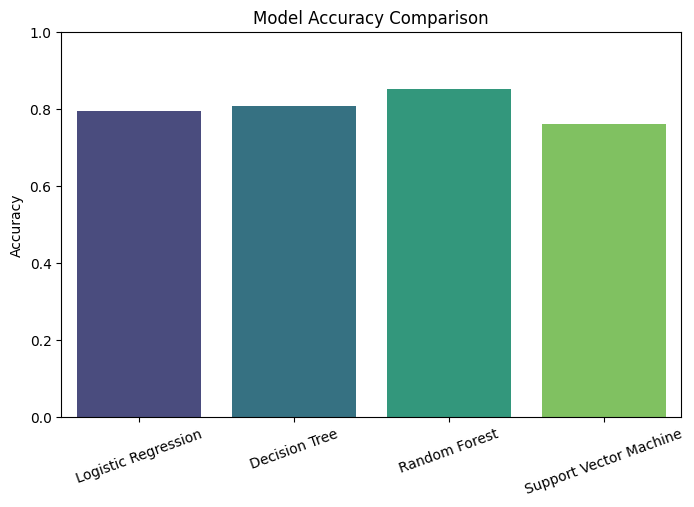

Decision Tree: 80.89%


/tmp/ipython-input-912887234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


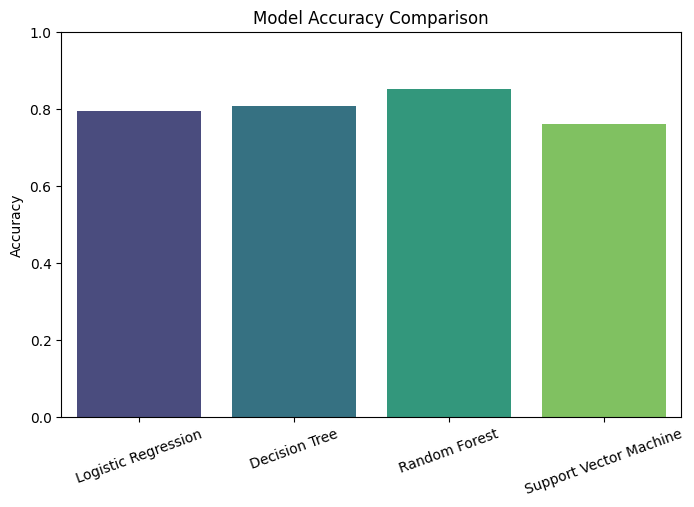

Random Forest: 85.32%


/tmp/ipython-input-912887234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


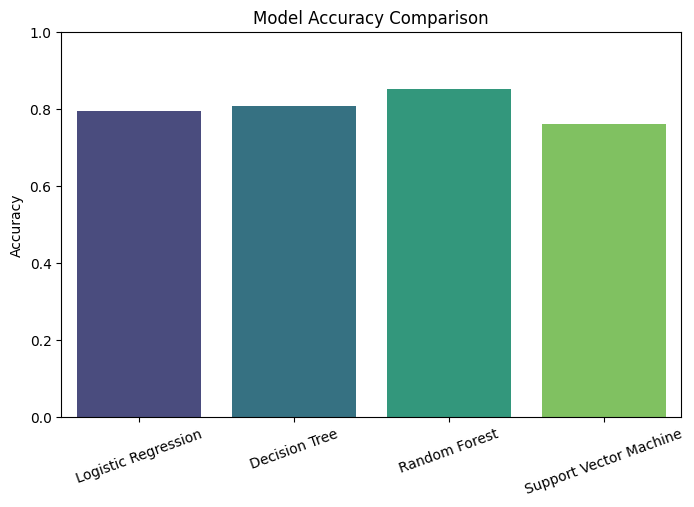

Support Vector Machine: 76.11%


/tmp/ipython-input-912887234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


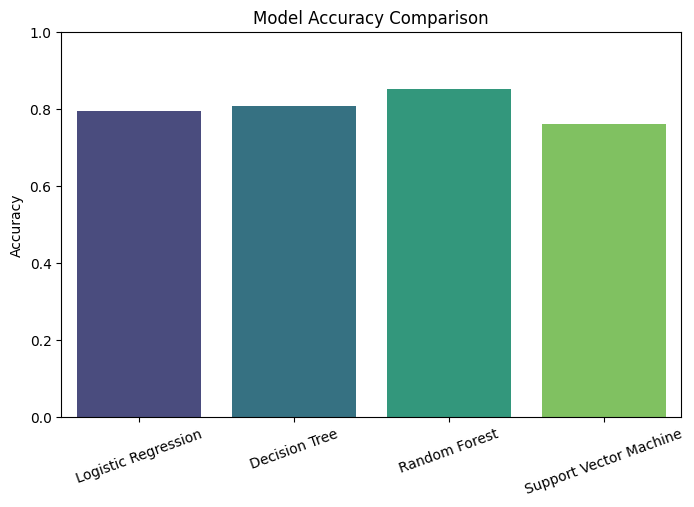

In [ ]:
print("\nModel Performance Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc*100:.2f}%")

    # Visualization
    plt.figure(figsize=(8,5))
    sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
    plt.title("Model Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.xticks(rotation=20)
    plt.show()



Best Model: Random Forest


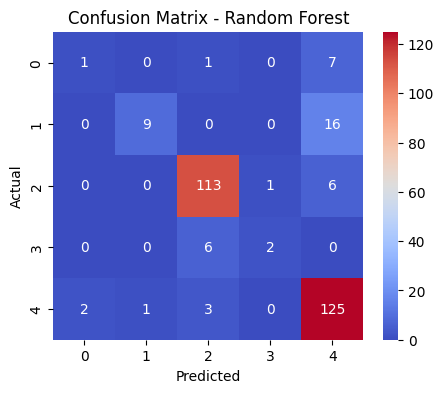


Project Completed Successfully ✅


In [ ]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nProject Completed Successfully ✅")